In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import pickle

%matplotlib inline

In [61]:
import shap
shap.initjs()

In [104]:
model = pickle.load(open('catbmodel_kazan_ln_4_all.pkl', 'rb'))

In [103]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11937,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
11938,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11939,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11940,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [105]:
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
9584,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9585,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9586,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [106]:
X = df[[
        'ОПлощадь',
        'Этаж_4',
        'Этажность_1',
        'ГП_2',
        'Ремонт_2',
        'Раст_центр_2',
        'Раст_метро_2',
        'Районы_2',
        'ЖК_БД'
      ]]

In [107]:
#получение shap-значений
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [108]:
shap_cols = [x + '_shap' for x in X]
shap_cols

['ОПлощадь_shap',
 'Этаж_4_shap',
 'Этажность_1_shap',
 'ГП_2_shap',
 'Ремонт_2_shap',
 'Раст_центр_2_shap',
 'Раст_метро_2_shap',
 'Районы_2_shap',
 'ЖК_БД_shap']

In [109]:
shap_values_df = pd.DataFrame(shap_values, columns = shap_cols)
shap_values_df

,ОПлощадь_shap,Этаж_4_shap,Этажность_1_shap,ГП_2_shap,Ремонт_2_shap,Раст_центр_2_shap,Раст_метро_2_shap,Районы_2_shap,ЖК_БД_shap
0,-0.394389,-0.038611,0.010111,0.114458,0.039825,-0.019655,-0.006839,-0.043446,-0.001514
1,-0.279273,-0.006242,0.046888,0.133531,0.042140,-0.245534,-0.006161,0.050370,-0.001480
2,-0.154092,0.006636,0.073089,0.116384,0.042799,0.088314,-0.004086,0.030220,-0.001592
3,-0.061403,-0.010598,0.023924,-0.165296,0.038140,-0.036732,-0.005199,-0.026850,-0.001626
4,-0.067475,0.007622,0.063426,0.099578,0.043476,-0.018119,-0.004940,0.010871,-0.001680
...,...,...,...,...,...,...,...,...,...
9583,0.414263,-0.003865,0.032197,0.107842,0.041536,-0.003855,-0.004734,0.062855,-0.001886
9584,-0.194765,0.001880,0.061403,0.134425,0.043071,0.101480,-0.002094,0.114199,-0.001655
9585,-0.172200,0.006537,0.076052,0.130124,0.043425,0.098895,-0.001545,0.114161,-0.001591
9586,-0.204256,0.002188,0.079417,0.131293,0.043036,0.099181,-0.002145,0.115327,-0.001586


In [110]:
df['ОПлощадь_shap'] = shap_values_df['ОПлощадь_shap']
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка,ОПлощадь_shap
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...,-0.394389
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...,-0.279273
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,-0.154092
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,-0.061403
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,-0.067475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...,0.414263
9584,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,-0.194765
9585,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,-0.172200
9586,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...,-0.204256


# ОПлощадь_shap
## Все районы 
### Зависимость цены от Оплощадь_shap

In [95]:
X = df['ОПлощадь_shap'].values.reshape(-1, 1)
Y = df['Цена'].values

lr = LinearRegression().fit(X, Y)

Y0 = lr.intercept_ + X.min() * lr.coef_
Y1 = lr.intercept_ + X.max() * lr.coef_

<function matplotlib.pyplot.show(close=None, block=None)>

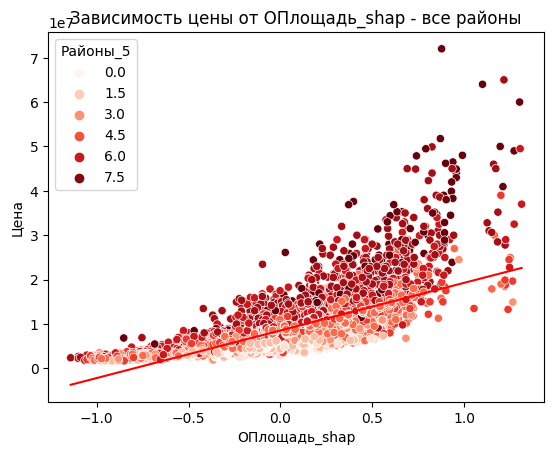

In [99]:
sns.scatterplot(data = df, x = df['ОПлощадь_shap'], y = df['Цена'], hue = 'Районы_5', palette = 'Reds')
plt.plot([X.min(), X.max()], [Y0, Y1], color = 'red')
plt.xlabel('ОПлощадь_shap')
plt.ylabel('Цена')
plt.title('Зависимость цены от ОПлощадь_shap - все районы')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

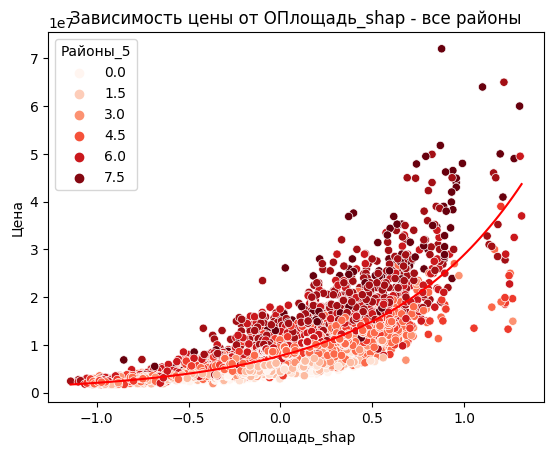

In [113]:
def exponential_func(x, a, b):
    return a *np.exp(b * x)

sns.scatterplot(data = df, x = df['ОПлощадь_shap'], y = df['Цена'], hue = 'Районы_5', palette = 'Reds')

popt, pcov = curve_fit(exponential_func, df['ОПлощадь_shap'], df['Цена'])
x_range = np.linspace(df['ОПлощадь_shap'].min(), df['ОПлощадь_shap'].max(), 100)

plt.plot(x_range, exponential_func(x_range, *popt), color = 'red', label = 'Зависимость цены от ОПлощадь_shap - все районы')
plt.legend
plt.title('Зависимость цены от ОПлощадь_shap - все районы')
plt.show

## Районы_5
### Зависимость цены от ОПлощадь_shap - Районы_5

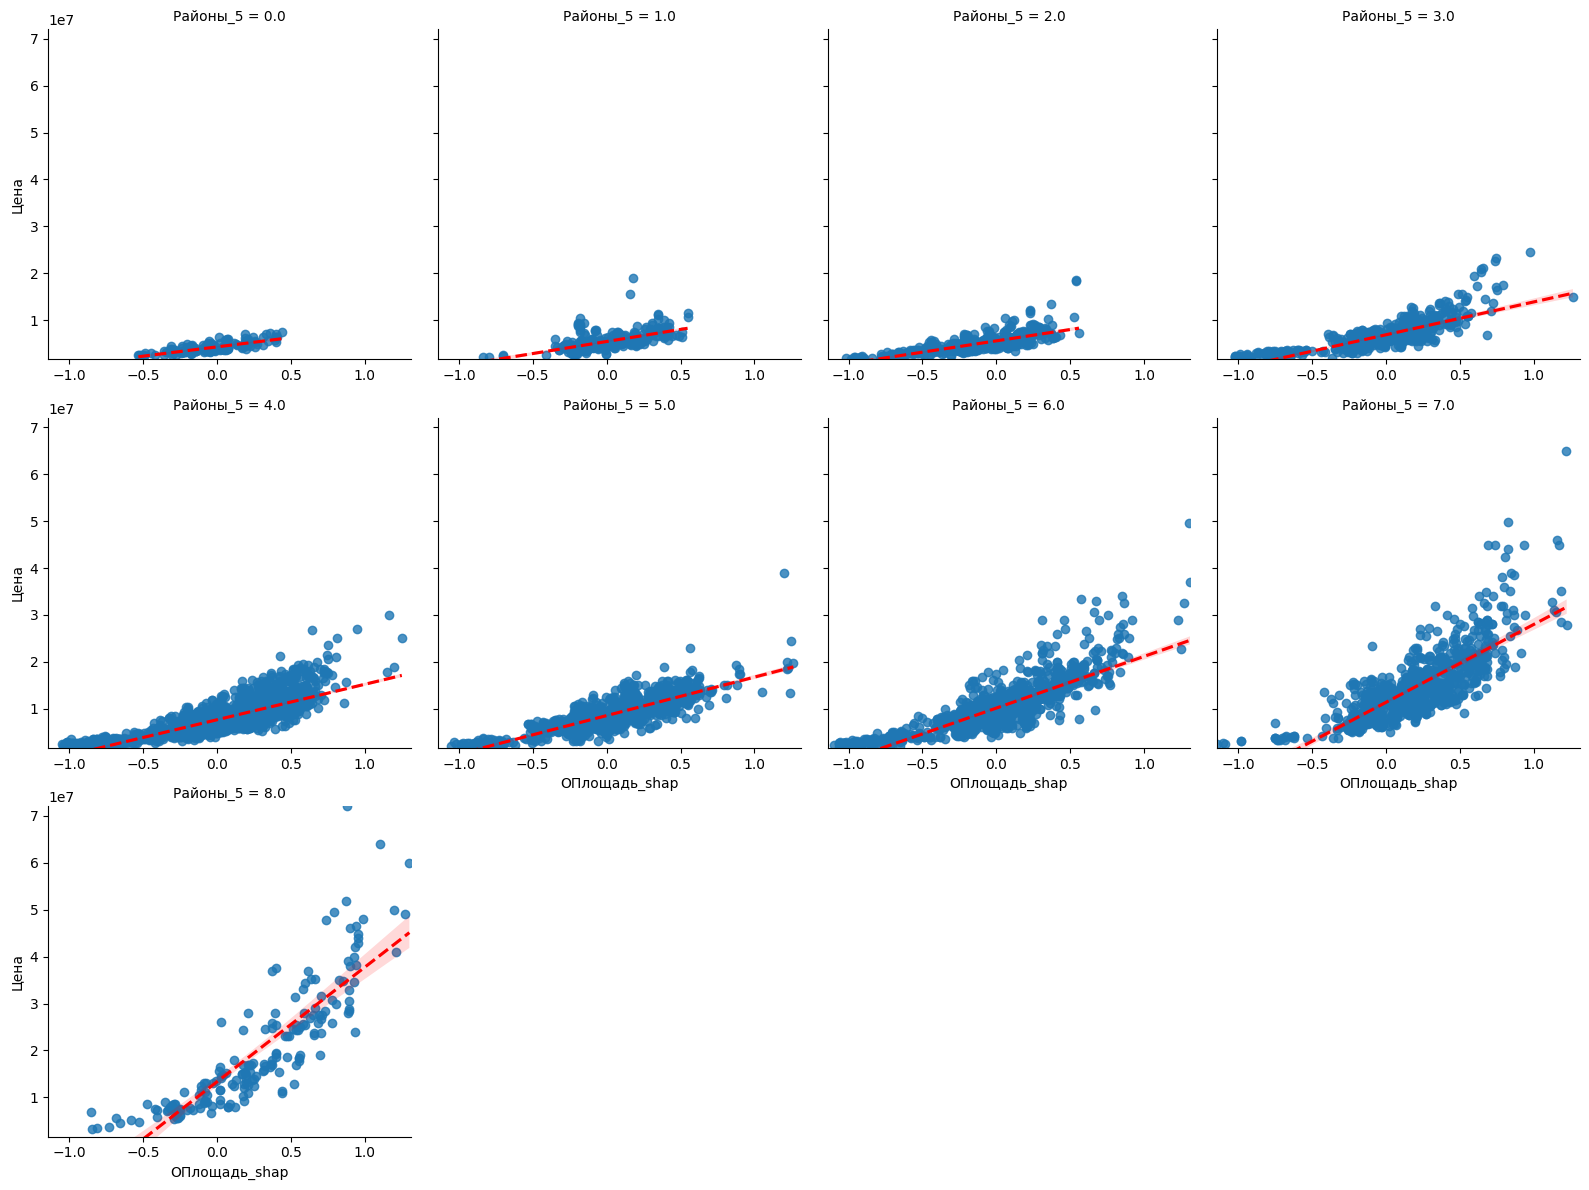

In [131]:
grid = sns.lmplot(x = "ОПлощадь_shap", 
                  y = "Цена", 
                  col = "Районы_5",
                  sharex = False, 
                  col_wrap = 4, 
                  data = df, 
                  height = 4,
                  line_kws = {'color': 'red', 'linestyle': '--'} 
                 )
                  
x_min = df['ОПлощадь_shap'].min()
x_max = df['ОПлощадь_shap'].max()
y_min = df['Цена'].min()
y_max = df['Цена'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

 ### Зависимость цены за кв.м. от ОПлощадь_shap - Районы_5

sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.


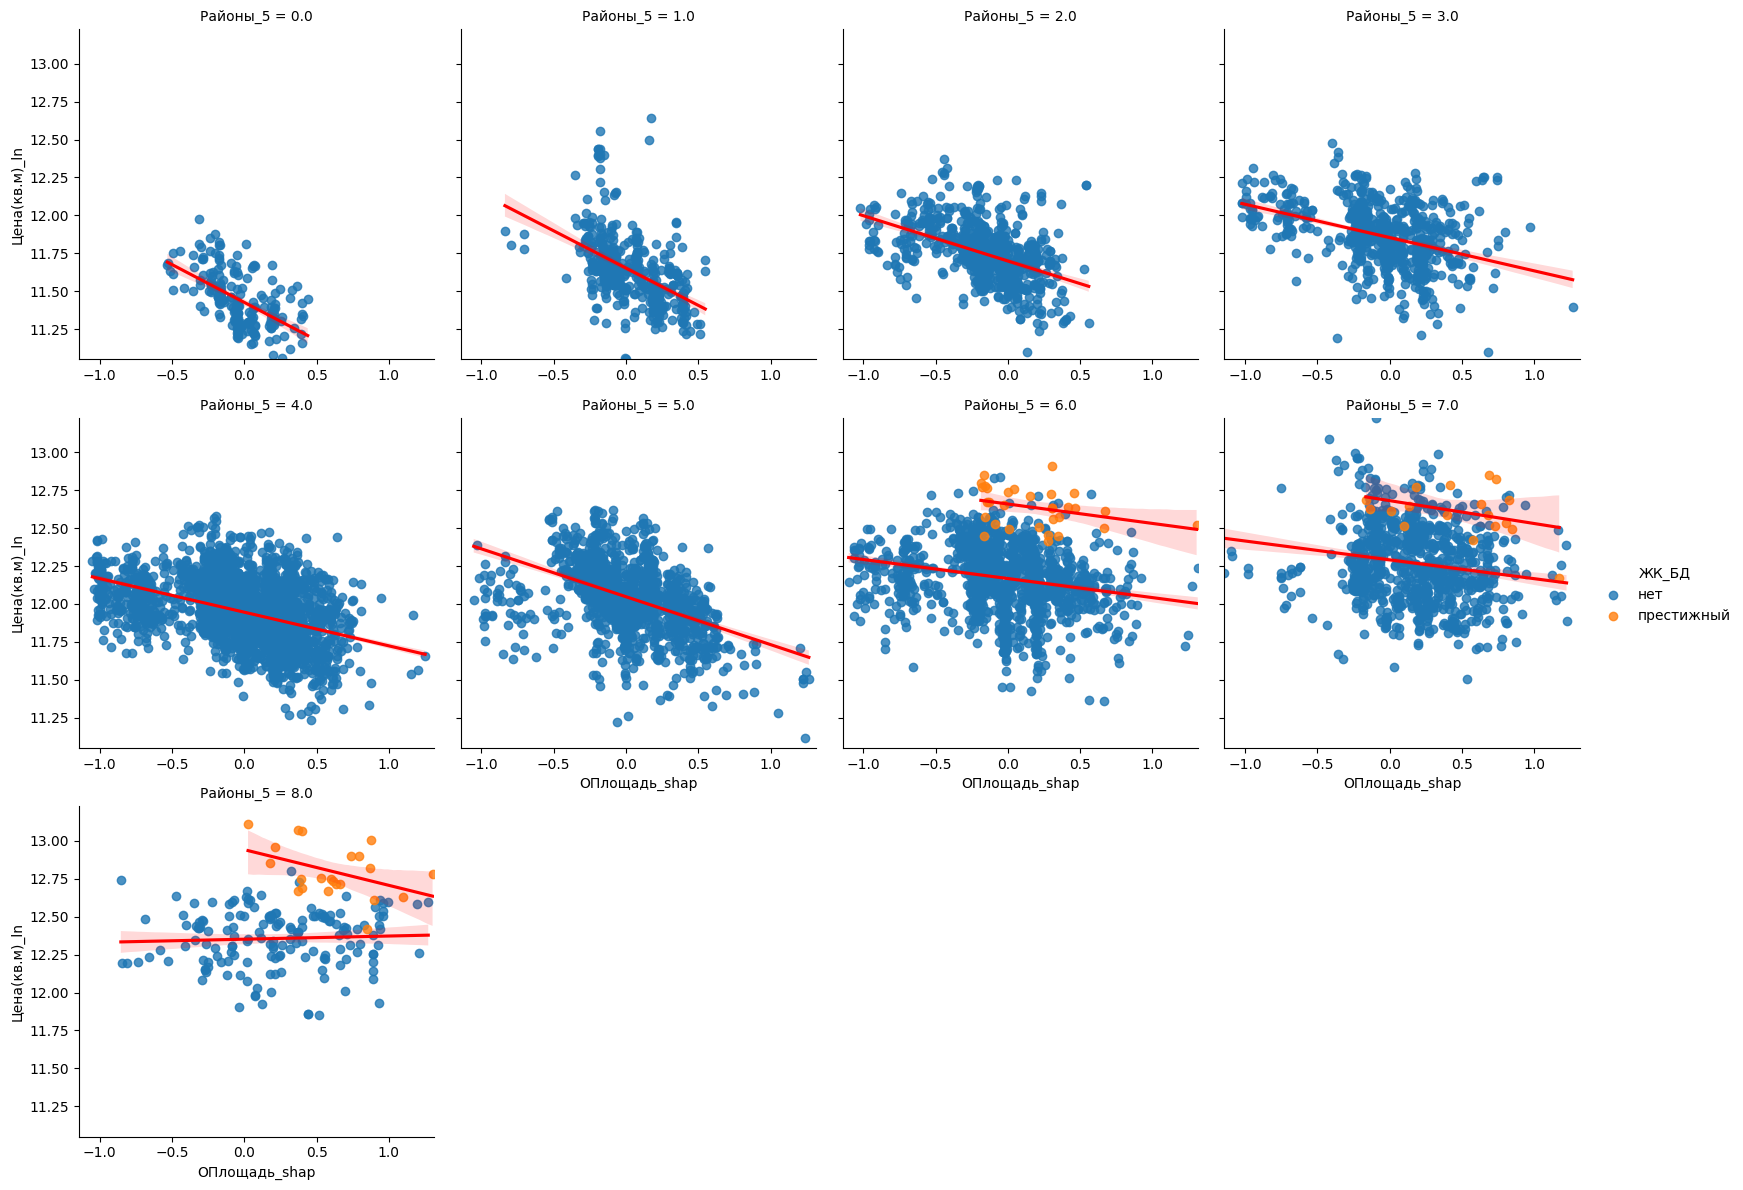

In [88]:
grid = sns.lmplot(x = "ОПлощадь_shap", 
                  y = "Цена(кв.м)_ln", 
                  col = "Районы_5",
                  sharex = False, 
                  col_wrap = 4, 
                  data = df, 
                  height = 4,
                  hue = 'ЖК_БД',
                  line_kws = {'color': 'red'} 
                 )
                  
x_min = df['ОПлощадь_shap'].min()
x_max = df['ОПлощадь_shap'].max()
y_min = df['Цена(кв.м)_ln'].min()
y_max = df['Цена(кв.м)_ln'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

## Гистограммы, boxplot

<AxesSubplot:xlabel='Count', ylabel='ОПлощадь_shap'>

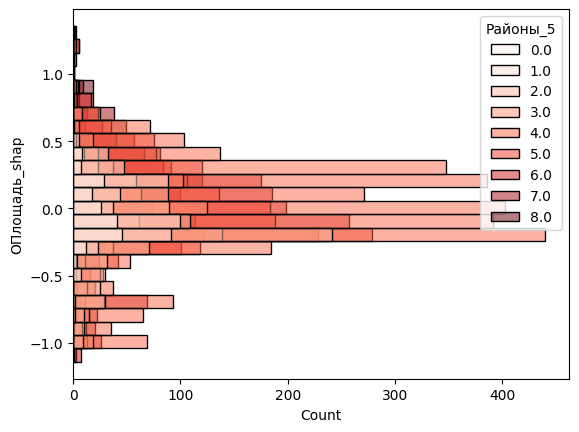

In [84]:
sns.histplot(data = df, 
             #x = 'Районы_5',
             y = 'ОПлощадь_shap',
             binwidth = 0.1, 
             hue = 'Районы_5',
             palette = 'Reds'
            )

<AxesSubplot:xlabel='ОПлощадь', ylabel='ОПлощадь_shap'>

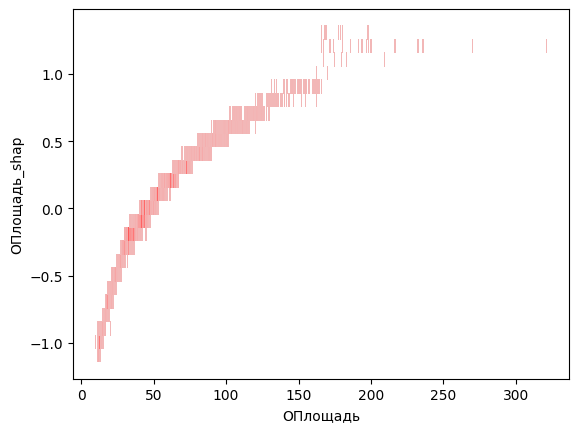

In [124]:
sns.histplot(data = df, 
             x = 'ОПлощадь',
             y = 'ОПлощадь_shap',
             binwidth = 0.1,
             #hue = 'Районы_5',
             color = 'Red'
            )

Text(0.5, 0.98, 'Распределение ОПлощадь_shap и ОПлощадь по Районам_5')

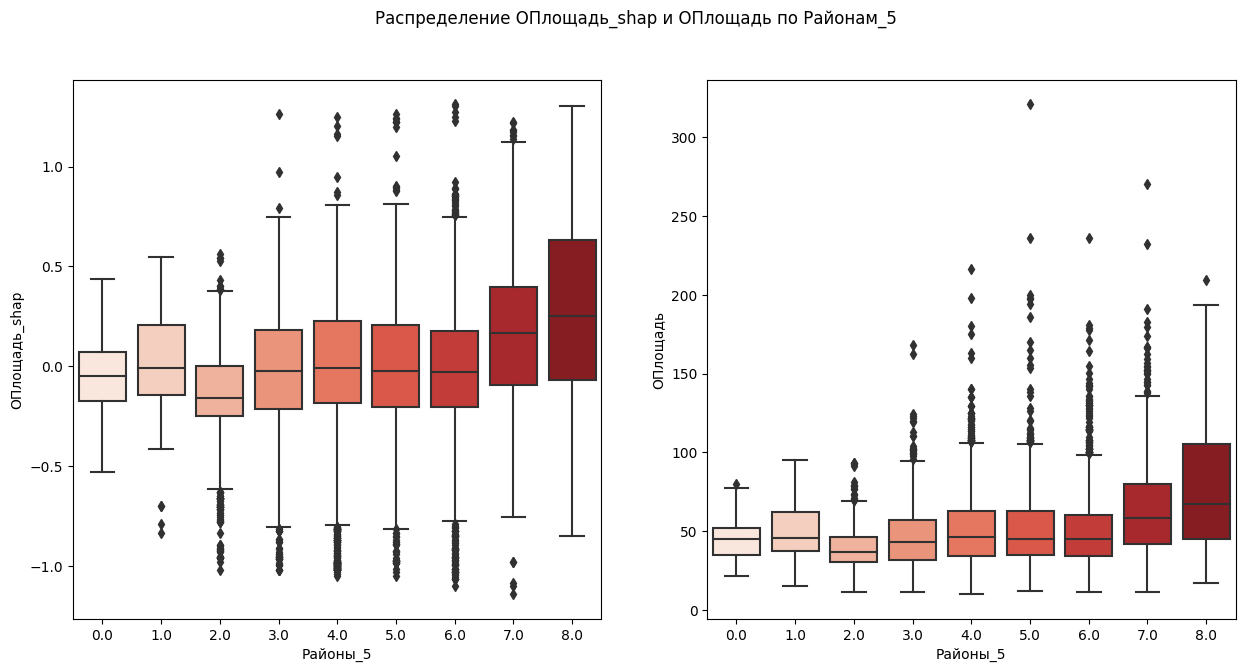

In [136]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))                                                                    #строим два графика в одном окне

sns.boxplot(x = 'Районы_5', 
            y = 'ОПлощадь_shap',
            data = df,
            palette = 'Reds',
            ax = ax[0]
           )

#ax[0].set_xlabel('Медианная_цена')
#ax[0].set_label('Районы_2')

sns.boxplot(                                                                                                       #строим boxplot
            x = 'Районы_5', 
            y = 'ОПлощадь',
            data = df,
            palette = 'Reds',
            ax = ax[1]                                                                                            #помещаем в 2 столбец окна
           )

#ax[1].set_xlabel('Медианная_цена')
#ax[1].set_label('Районы_2')
#ax[0].get_legend().remove()     #отключаем легенду у площади
#ax[1].get_legend().remove()     #отключаем легенду у ГП

fig.suptitle(f'Распределение ОПлощадь_shap и ОПлощадь по Районам_5')  

<function matplotlib.pyplot.show(close=None, block=None)>

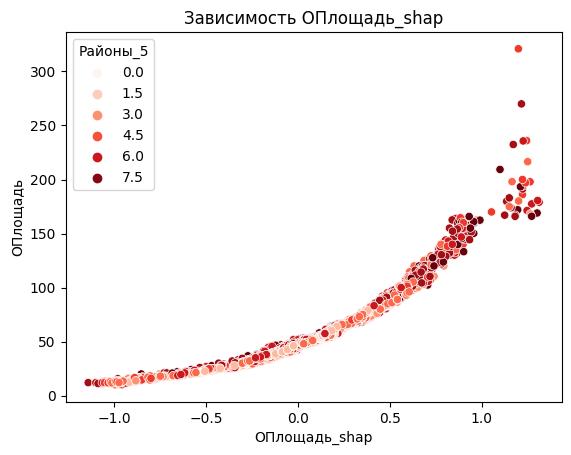

In [134]:
sns.scatterplot(data = df, x = df['ОПлощадь_shap'], y = df['ОПлощадь'], hue = 'Районы_5', palette = 'Reds')
#plt.plot([X.min(), X.max()], [Y0, Y1], color = 'red')
plt.xlabel('ОПлощадь_shap')
plt.ylabel('ОПлощадь')
plt.title('Зависимость ОПлощадь_shap')
plt.show